In [82]:
# Import libraries

import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [83]:
# Import Data
X_train= pd.read_csv('/Users/cuicuisong/Desktop/data/train_all_feature.csv',  index_col=0)
X_test= pd.read_csv('/Users/cuicuisong/Desktop/data/test_all_feature.csv',  index_col=0)
y_train= pd.read_csv('/Users/cuicuisong/Desktop/data/y_train_new.csv')
y_test= pd.read_csv('/Users/cuicuisong/Desktop/data/y_test_new.csv')

In [86]:
print(y_test['PotentialFraud'].value_counts())

0    979
1    103
Name: PotentialFraud, dtype: int64


In [3]:
X_train.head()

,DeductibleAmtPaid_mean,DeductibleAmtPaid_max,NoOfMonths_PartACov_mean,NoOfMonths_PartBCov_mean,OPAnnualReimbursementAmt_mean,OPAnnualReimbursementAmt_max,OPAnnualReimbursementAmt_sum,OPAnnualDeductibleAmt_mean,OPAnnualDeductibleAmt_max,OPAnnualDeductibleAmt_sum,...,totalProcCode_3722,totalProcCode_8151,totalProcCode_8872,totalProcCode_9671,totalProcCode_4513,totalProcCode_5849,totalProcCode_9390,totalProcCode_Other,TotalTeDiagCode,TotalTeProcCode
Provider,,,,,,,,,,,,,,,,,,,,,
PRV51001,213.600000,1068.0,12.000000,12.000000,2615.200000,13460,65380,463.920000,2700,11598,...,0,0,0,0,0,0,0,125,1.166158,1.186518
PRV51004,2.080537,100.0,11.865772,11.959732,2194.899329,20900,327040,622.751678,7410,92790,...,0,0,0,0,0,0,0,745,1.144495,1.161067
PRV51005,3.175966,200.0,11.907296,11.939914,2109.733906,97510,2457840,636.328755,6330,741323,...,0,0,0,0,0,0,0,5825,1.174065,1.161067
PRV51008,53.860465,1068.0,12.000000,12.000000,2570.465116,20500,110530,616.046512,4140,26490,...,0,0,0,0,0,0,0,215,1.144524,1.163394
PRV51011,23.586207,1068.0,12.000000,12.000000,1399.310345,6340,81160,366.724138,1070,21270,...,0,0,0,0,0,0,0,290,1.141459,1.161067


In [60]:
X_test.head()

,DeductibleAmtPaid_mean,DeductibleAmtPaid_max,NoOfMonths_PartACov_mean,NoOfMonths_PartBCov_mean,OPAnnualReimbursementAmt_mean,OPAnnualReimbursementAmt_max,OPAnnualReimbursementAmt_sum,OPAnnualDeductibleAmt_mean,OPAnnualDeductibleAmt_max,OPAnnualDeductibleAmt_sum,...,totalProcCode_3722,totalProcCode_8151,totalProcCode_8872,totalProcCode_9671,totalProcCode_4513,totalProcCode_5849,totalProcCode_9390,totalProcCode_Other,TotalTeDiagCode,TotalTeProcCode
Provider,,,,,,,,,,,,,,,,,,,,,
PRV51003,502.166667,1068.0,11.818182,11.871212,2678.181818,31880,353520,737.121212,9950,97300,...,0,0,0,0,0,0,0,660,1.180504,1.100834
PRV51007,45.333333,1068.0,11.833333,11.833333,1729.722222,6060,124540,469.722222,1970,33820,...,0,0,0,0,0,0,0,360,1.014301,1.022005
PRV51025,164.183908,1068.0,12.000000,12.000000,2288.965517,23330,199140,621.379310,8280,54060,...,0,0,0,0,0,0,0,435,1.035489,1.052657
PRV51026,4.473684,100.0,11.684211,12.000000,1811.578947,6700,137680,680.394737,2700,51710,...,0,0,0,0,0,0,0,380,0.999096,1.022881
PRV51041,7.941176,100.0,12.000000,12.000000,2287.647059,28900,77780,613.823529,7680,20870,...,0,0,0,0,0,0,0,170,0.990358,1.022881


In [4]:
display(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(4328, 104)

(1082, 104)

(4328, 1)

(1082, 1)

In [25]:
# fill NA as 0, X_test has two null values
X_test.fillna(0,inplace=True)

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score,roc_auc_score
from sklearn.decomposition import PCA

#### I. Baseline model

In [22]:
steps = [('rescale', StandardScaler()), 
         ('logreg', LogisticRegression(random_state=42,max_iter=10000))]
model = Pipeline(steps)
model.fit(X_train, y_train)

Pipeline(steps=[('rescale', StandardScaler()),
                ('logreg',
                 LogisticRegression(max_iter=10000, random_state=42))])

In [19]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [20]:
print('---------------------Train Classification Report--------------------------------\n')
print(classification_report(y_train, y_train_pred))
print('---------------------Test Classification Report--------------------------------\n')
print(classification_report(y_test, y_test_pred))

---------------------Train Classification Report--------------------------------

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3925
           1       0.88      0.75      0.81       403

    accuracy                           0.97      4328
   macro avg       0.93      0.87      0.89      4328
weighted avg       0.97      0.97      0.97      4328

---------------------Test Classification Report--------------------------------

              precision    recall  f1-score   support

           0       0.90      1.00      0.95       979
           1       0.00      0.00      0.00       103

    accuracy                           0.90      1082
   macro avg       0.45      0.50      0.48      1082
weighted avg       0.82      0.90      0.86      1082



Text(0.5, 1.0, 'Test ROC Curve')

<Figure size 432x288 with 0 Axes>

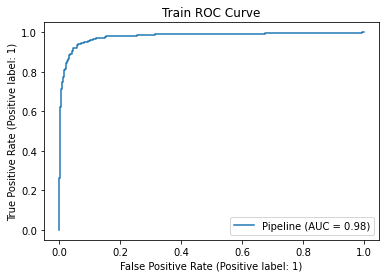

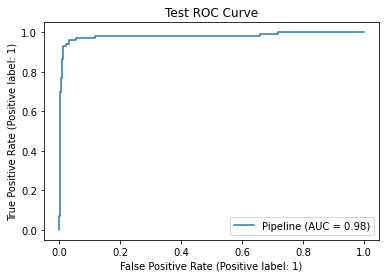

In [26]:
from sklearn.metrics import plot_roc_curve 

plt.figure(1).clf()

plot_roc_curve(model, X_train, y_train)

plt.title('Train ROC Curve')

plot_roc_curve(model, X_test, y_test)
plt.title('Test ROC Curve')

In [27]:
y_train_proba= model.predict_proba(X_train)
y_test_proba= model.predict_proba(X_test)

y_train_score = y_train_proba[:, 1]
y_test_score = y_test_proba [:, 1]

PR-AUC is 0.89


Text(0.5, 1.0, 'Precision-Recall Curve of Train')

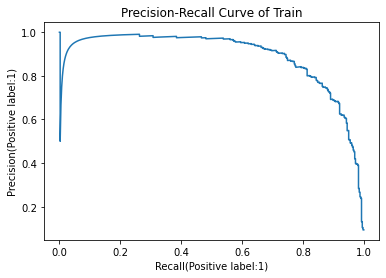

In [30]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc,plot_precision_recall_curve
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html

# Data to plot precision - recall curve
precision_train, recall_train, thresholds_train = precision_recall_curve(y_train, y_train_score)
# Use AUC function to calculate the area under the curve of precision recall curve
auc_precision_recalltrain = auc(recall_train, precision_train)
print('PR-AUC is {:.2f}'.format(auc_precision_recalltrain))

# plot PR curve
plt.plot(recall_train, precision_train)
plt.xlabel('Recall(Positive label:1)')
plt.ylabel('Precision(Positive label:1)')
plt.title('Precision-Recall Curve of Train')


PR-AUC is 0.91


Text(0.5, 1.0, 'Precision-Recall Curve of Test ')

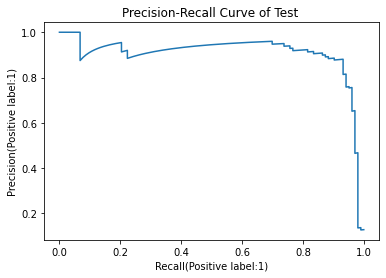

In [31]:
# test

# Data to plot precision - recall curve
precision_test, recall_test, thresholds_test = precision_recall_curve(y_test, y_test_score)
auc_precision_recall_test = auc(recall_test, precision_test)
print('PR-AUC is {:.2f}'.format(auc_precision_recall_test))

# plot PR curve
plt.plot(recall_test, precision_test)
plt.xlabel('Recall(Positive label:1)')
plt.ylabel('Precision(Positive label:1)')
plt.title('Precision-Recall Curve of Test ')

In [ ]:
# 1.2 Feature importance

In [32]:
# calculate the feature score
# model[1]: logisticregression
importance = model[1].coef_[0]  
# for i,j in enumerate(importance):
# print('Feature: %0d, Score: %.5f' % (i,j))

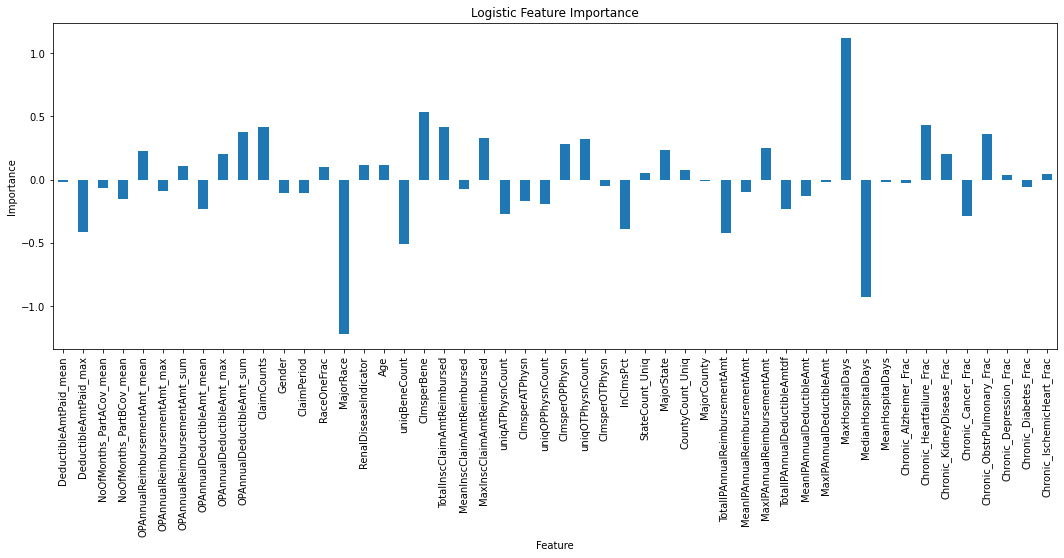

In [44]:
# plot feature importance
feature_names = X_train.columns
feature_importance = (pd.Series(importance, index = feature_names)) #.sort_values(ascending=False)
plt.figure(figsize=(18,6))
feature_importance[:50].plot.bar()
plt.title('Logistic Feature Importance')
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.show()

#? negative values ?

In [47]:
from sklearn.feature_selection import SelectFromModel

In [48]:
pipeline1 = Pipeline([
    ('selector', SelectFromModel(estimator=LogisticRegression(random_state=42,max_iter=10000), max_features=50, threshold=-np.inf)),
    ('regressor',LogisticRegression())
])

pipeline1.fit(X_train, y_train)

selected_features1 = pipeline1['selector'].get_support()
print(selected_features1.sum())

50


In [49]:
selected_features_names1 = X_train.columns[selected_features1].tolist()
print(selected_features_names1)

['DeductibleAmtPaid_max', 'NoOfMonths_PartACov_mean', 'NoOfMonths_PartBCov_mean', 'OPAnnualReimbursementAmt_mean', 'OPAnnualDeductibleAmt_mean', 'Gender', 'ClaimPeriod', 'RaceOneFrac', 'MajorRace', 'Age', 'uniqBeneCount', 'ClmsperBene', 'uniqATPhysnCount', 'ClmsperATPhysn', 'uniqOPPhysnCount', 'ClmsperOPPhysn', 'uniqOTPhysnCount', 'ClmsperOTPhysn', 'StateCount_Uniq', 'MajorState', 'CountyCount_Uniq', 'MajorCounty', 'MaxHospitalDays', 'MedianHospitalDays', 'MeanHospitalDays', 'Chronic_Heartfailure_Frac', 'Chronic_Diabetes_Frac', 'Chronic_IschemicHeart_Frac', 'MaxDiagCodeNumPerClaim', 'MeanDiagCodeNumPerClaim', 'TotalDiagCodeNum', 'TotalProcCodeNum', 'MeanHighFreqDiagCodeNumPerClaim', 'MeanMediumFreqDiagCodeNumPerClaim', 'MeanRareFreqDiagCodeNumPerClaim', 'TotalMediumHighFreqProcCodeNumPerClaim', 'totalDiagCode_4019', 'totalDiagCode_25000', 'totalDiagCode_V5869', 'totalDiagCode_42731', 'totalDiagCode_2720', 'totalDiagCode_2449', 'totalDiagCode_4280', 'totalDiagCode_53081', 'totalDiagCode

In [54]:
X_train_reduced50 = X_train[['DeductibleAmtPaid_max', 'NoOfMonths_PartACov_mean', 'NoOfMonths_PartBCov_mean', 'OPAnnualReimbursementAmt_mean', 'OPAnnualDeductibleAmt_mean', 'Gender', 'ClaimPeriod', 'RaceOneFrac', 'MajorRace', 'Age', 'uniqBeneCount', 'ClmsperBene', 'uniqATPhysnCount', 'ClmsperATPhysn', 'uniqOPPhysnCount', 'ClmsperOPPhysn', 'uniqOTPhysnCount', 'ClmsperOTPhysn', 'StateCount_Uniq', 'MajorState', 'CountyCount_Uniq', 'MajorCounty', 'MaxHospitalDays', 'MedianHospitalDays', 'MeanHospitalDays', 'Chronic_Heartfailure_Frac', 'Chronic_Diabetes_Frac', 'Chronic_IschemicHeart_Frac', 'MaxDiagCodeNumPerClaim', 'MeanDiagCodeNumPerClaim', 'TotalDiagCodeNum', 'TotalProcCodeNum', 'MeanHighFreqDiagCodeNumPerClaim', 'MeanMediumFreqDiagCodeNumPerClaim', 'MeanRareFreqDiagCodeNumPerClaim', 'TotalMediumHighFreqProcCodeNumPerClaim', 'totalDiagCode_4019', 'totalDiagCode_25000', 'totalDiagCode_V5869', 'totalDiagCode_42731', 'totalDiagCode_2720', 'totalDiagCode_2449', 'totalDiagCode_4280', 'totalDiagCode_53081', 'totalDiagCode_41401', 'totalDiagCode_496', 'totalDiagCode_2589', 'totalDiagCode_Other', 'TotalTeDiagCode', 'TotalTeProcCode']]

In [52]:
X_test_reduced50 = X_test[['DeductibleAmtPaid_max', 'NoOfMonths_PartACov_mean', 'NoOfMonths_PartBCov_mean', 'OPAnnualReimbursementAmt_mean', 'OPAnnualDeductibleAmt_mean', 'Gender', 'ClaimPeriod', 'RaceOneFrac', 'MajorRace', 'Age', 'uniqBeneCount', 'ClmsperBene', 'uniqATPhysnCount', 'ClmsperATPhysn', 'uniqOPPhysnCount', 'ClmsperOPPhysn', 'uniqOTPhysnCount', 'ClmsperOTPhysn', 'StateCount_Uniq', 'MajorState', 'CountyCount_Uniq', 'MajorCounty', 'MaxHospitalDays', 'MedianHospitalDays', 'MeanHospitalDays', 'Chronic_Heartfailure_Frac', 'Chronic_Diabetes_Frac', 'Chronic_IschemicHeart_Frac', 'MaxDiagCodeNumPerClaim', 'MeanDiagCodeNumPerClaim', 'TotalDiagCodeNum', 'TotalProcCodeNum', 'MeanHighFreqDiagCodeNumPerClaim', 'MeanMediumFreqDiagCodeNumPerClaim', 'MeanRareFreqDiagCodeNumPerClaim', 'TotalMediumHighFreqProcCodeNumPerClaim', 'totalDiagCode_4019', 'totalDiagCode_25000', 'totalDiagCode_V5869', 'totalDiagCode_42731', 'totalDiagCode_2720', 'totalDiagCode_2449', 'totalDiagCode_4280', 'totalDiagCode_53081', 'totalDiagCode_41401', 'totalDiagCode_496', 'totalDiagCode_2589', 'totalDiagCode_Other', 'TotalTeDiagCode', 'TotalTeProcCode']]

In [56]:
steps_reduced50 = [('rescale', StandardScaler()), 
         ('logreg', LogisticRegression(random_state=42,max_iter=10000))]
model_reduced50 = Pipeline(steps_reduced50)
model_reduced50.fit(X_train_reduced50, y_train)

Pipeline(steps=[('rescale', StandardScaler()),
                ('logreg',
                 LogisticRegression(max_iter=10000, random_state=42))])

In [57]:
y_train_pred50= model_reduced50.predict(X_train_reduced50)
y_test_pred50 = model_reduced50.predict(X_test_reduced50)

In [58]:
y_train_proba50= model_reduced50.predict_proba(X_train_reduced50)
y_test_proba50= model_reduced50.predict_proba(X_test_reduced50)

y_train_score50 = y_train_proba50[:, 1]
y_test_score50 = y_test_proba50[:, 1]

In [78]:
print('---------------------Train Classification Report--------------------------------\n')
print(classification_report(y_train, y_train_pred50))
print('---------------------Test Classification Report--------------------------------\n')
print(classification_report(y_test, y_test_pred50))

---------------------Train Classification Report--------------------------------

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3925
           1       0.86      0.72      0.79       403

    accuracy                           0.96      4328
   macro avg       0.92      0.86      0.88      4328
weighted avg       0.96      0.96      0.96      4328

---------------------Test Classification Report--------------------------------

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       979
           1       1.00      0.05      0.09       103

    accuracy                           0.91      1082
   macro avg       0.95      0.52      0.52      1082
weighted avg       0.92      0.91      0.87      1082



PR-AUC is 0.88


Text(0.5, 1.0, 'Precision-Recall Curve of Train 50')

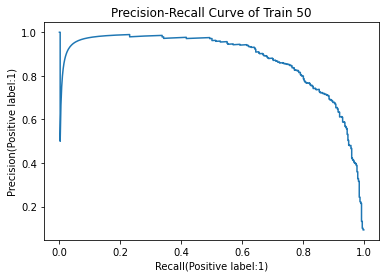

In [61]:
precision_train50, recall_train50, thresholds_train50 = precision_recall_curve(y_train, y_train_score50)
# Use AUC function to calculate the area under the curve of precision recall curve
auc_precision_recalltrain50 = auc(recall_train50, precision_train50)
print('PR-AUC is {:.2f}'.format(auc_precision_recalltrain50))

# plot PR curve
plt.plot(recall_train50, precision_train50)
plt.xlabel('Recall(Positive label:1)')
plt.ylabel('Precision(Positive label:1)')
plt.title('Precision-Recall Curve of Train 50')

PR-AUC is 0.91


Text(0.5, 1.0, 'Precision-Recall Curve of Test 50')

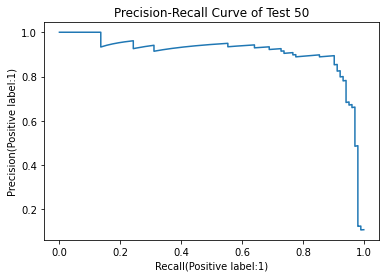

In [63]:
precision_test50, recall_test50, thresholds_test50 = precision_recall_curve(y_test, y_test_score50)
# Use AUC function to calculate the area under the curve of precision recall curve
auc_precision_recalltest50 = auc(recall_test50, precision_test50)
print('PR-AUC is {:.2f}'.format(auc_precision_recalltest50))

# plot PR curve
plt.plot(recall_test50, precision_test50)
plt.xlabel('Recall(Positive label:1)')
plt.ylabel('Precision(Positive label:1)')
plt.title('Precision-Recall Curve of Test 50')


# Note: same as all features

#### II. Modeling with balanced class weights

In [ ]:
### 2.1 all features

In [64]:
steps_balanced = [('rescale', StandardScaler()), 
          ('logreg', LogisticRegression(class_weight = 'balanced',random_state=42,max_iter=10000))]
model_balanced = Pipeline(steps_balanced)
model_balanced.fit(X_train, y_train)

Pipeline(steps=[('rescale', StandardScaler()),
                ('logreg',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    random_state=42))])

In [66]:
y_train_predbal= model_balanced .predict(X_train)
y_test_predbal = model_balanced .predict(X_test)

In [67]:
y_train_probabal= model_balanced .predict_proba(X_train)
y_test_probabal= model_balanced .predict_proba(X_test)

y_train_scorebal = y_train_probabal[:, 1]
y_test_scorebal = y_test_probabal[:, 1]

In [75]:
print('---------------------Train Classification Report--------------------------------\n')
print(classification_report(y_train, y_train_predbal))
print('---------------------Test Classification Report--------------------------------\n')
print(classification_report(y_test, y_test_predbal))

---------------------Train Classification Report--------------------------------

              precision    recall  f1-score   support

           0       0.99      0.93      0.96      3925
           1       0.58      0.95      0.72       403

    accuracy                           0.93      4328
   macro avg       0.79      0.94      0.84      4328
weighted avg       0.96      0.93      0.94      4328

---------------------Test Classification Report--------------------------------

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       979
           1       1.00      0.01      0.02       103

    accuracy                           0.91      1082
   macro avg       0.95      0.50      0.48      1082
weighted avg       0.91      0.91      0.86      1082



PR-AUC is 0.85


Text(0.5, 1.0, 'Precision-Recall Curve of Train Balanced')

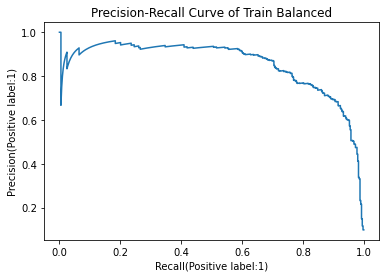

In [76]:
precision_trainbal, recall_trainbal, thresholds_trainbal = precision_recall_curve(y_train, y_train_scorebal)
# Use AUC function to calculate the area under the curve of precision recall curve
auc_precision_recalltrainbal = auc(recall_trainbal, precision_trainbal)
print('PR-AUC is {:.2f}'.format(auc_precision_recalltrainbal))

# plot PR curve
plt.plot(recall_trainbal, precision_trainbal)
plt.xlabel('Recall(Positive label:1)')
plt.ylabel('Precision(Positive label:1)')
plt.title('Precision-Recall Curve of Train Balanced')

PR-AUC is 0.91


Text(0.5, 1.0, 'Precision-Recall Curve of Test Balanced')

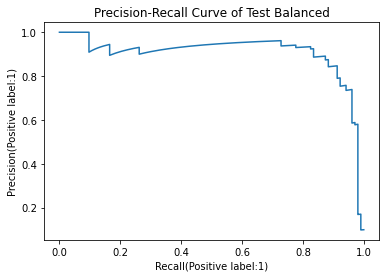

In [77]:
precision_testbal, recall_testbal, thresholds_testbal = precision_recall_curve(y_test, y_test_scorebal)
# Use AUC function to calculate the area under the curve of precision recall curve
auc_precision_recalltestbal = auc(recall_testbal, precision_testbal)
print('PR-AUC is {:.2f}'.format(auc_precision_recalltestbal))

# plot PR curve
plt.plot(recall_testbal, precision_testbal)
plt.xlabel('Recall(Positive label:1)')
plt.ylabel('Precision(Positive label:1)')
plt.title('Precision-Recall Curve of Test Balanced')

In [ ]:
##### 2.2 50 featurs

In [71]:
steps_balanced50 = [('rescale', StandardScaler()), 
          ('logreg', LogisticRegression(class_weight = 'balanced',random_state=42,max_iter=10000))]
model_balanced50 = Pipeline(steps_balanced)
model_balanced50.fit(X_train_reduced50, y_train)

Pipeline(steps=[('rescale', StandardScaler()),
                ('logreg',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    random_state=42))])

In [72]:
y_train_predbal50= model_balanced50.predict(X_train_reduced50)
y_test_predbal50 = model_balanced50.predict(X_test_reduced50)

In [74]:
y_train_probabal50= model_balanced50.predict_proba(X_train_reduced50)
y_test_probabal50= model_balanced50.predict_proba(X_test_reduced50)

y_train_scorebal50 = y_train_probabal50[:, 1]
y_test_scorebal50 = y_test_probabal50[:, 1]

In [79]:
print('---------------------Train Classification Report--------------------------------\n')
print(classification_report(y_train, y_train_predbal50))
print('---------------------Test Classification Report--------------------------------\n')
print(classification_report(y_test, y_test_predbal50))

---------------------Train Classification Report--------------------------------

              precision    recall  f1-score   support

           0       0.99      0.92      0.96      3925
           1       0.56      0.95      0.70       403

    accuracy                           0.93      4328
   macro avg       0.78      0.94      0.83      4328
weighted avg       0.95      0.93      0.93      4328

---------------------Test Classification Report--------------------------------

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       979
           1       0.95      0.18      0.31       103

    accuracy                           0.92      1082
   macro avg       0.94      0.59      0.63      1082
weighted avg       0.92      0.92      0.90      1082



PR-AUC is 0.85


Text(0.5, 1.0, 'Precision-Recall Curve of Train balanced 50')

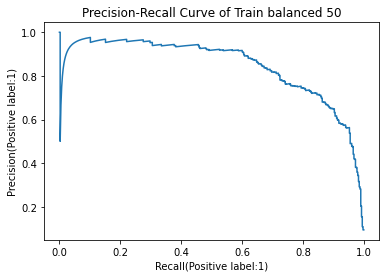

In [80]:
precision_trainbal50, recall_trainbal50, thresholds_trainbal50 = precision_recall_curve(y_train, y_train_scorebal50)
# Use AUC function to calculate the area under the curve of precision recall curve
auc_precision_recalltrainbal50 = auc(recall_trainbal50, precision_trainbal50)
print('PR-AUC is {:.2f}'.format(auc_precision_recalltrainbal50))

# plot PR curve
plt.plot(recall_trainbal50, precision_trainbal50)
plt.xlabel('Recall(Positive label:1)')
plt.ylabel('Precision(Positive label:1)')
plt.title('Precision-Recall Curve of Train balanced 50')

PR-AUC is 0.90


Text(0.5, 1.0, 'Precision-Recall Curve of Test Balanced 50')

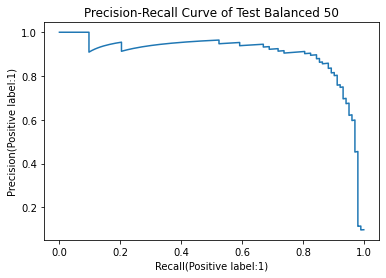

In [81]:
precision_testbal50, recall_testbal50, thresholds_testbal50 = precision_recall_curve(y_test, y_test_scorebal50)
# Use AUC function to calculate the area under the curve of precision recall curve
auc_precision_recalltestbal50 = auc(recall_testbal50, precision_testbal50)
print('PR-AUC is {:.2f}'.format(auc_precision_recalltestbal50))

# plot PR curve
plt.plot(recall_testbal50, precision_testbal50)
plt.xlabel('Recall(Positive label:1)')
plt.ylabel('Precision(Positive label:1)')
plt.title('Precision-Recall Curve of Test Balanced 50')

#### III. Cross Validation

#### 3.1 With all features

In [ ]:
from xgboost import cv

In [ ]:

from xgboost import XGBClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold

iris = load_iris()
x, y = iris.data, iris.target
xtrain, xtest, ytrain, ytest=train_test_split(x, y, test_size=0.15)

xgbc = XGBClassifier()
print(xgbc)

xgbc.fit(xtrain, ytrain)

# - cross validataion
scores = cross_val_score(xgbc, xtrain, ytrain, cv=5)
print("Mean cross-validation score: %.2f" % scores.mean())

kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xgbc, xtrain, ytrain, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

ypred = xgbc.predict(xtest)
cm = confusion_matrix(ytest,ypred)
print(cm)

# PR-AUC Comparison

In [ ]:
# Intitialize figure with two plots
fig, ax = plt.subplots()
# fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

ax.plot(recall, precision, label='Baseline with all features')
ax.plot(recall_reduced50, precision_reduced50, label='Baseline with 50 Features')
ax.plot(recall_para, precision_para, label='Parameters with all features')
ax.plot(recall_para50_test, precision_para50_test, label='Parameters with 50 features')


## Configure x and y axis
ax.set_xlabel('Recall', fontweight='bold')
ax.set_ylabel('Precision', fontweight='bold')
ax.set_ylim(0, 1)
## Create legend & title
ax.set_title('Test PR-AUC Curve Comparison', fontsize=14, fontweight='bold')
ax.legend(loc=1)

plt.show()



